In [264]:
import os
import carbon_tracker

# Create the emissions folder if it doesn't exist
if not os.path.exists('./emissions'):
	os.makedirs('./emissions')

#improt file in "Sad-Brain-Analytics-Hackathon\carbon_tracker.py"
%run carbon_tracker.py
carbon_tracker.start_tracker()

# **Import libraries:**

In [265]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
carbon_tracker.start_tracker()
carbon_tracker.update_project_name('Import Libraries')

c:\Users\oo\Desktop\Github DEV\Sad-Brain-Analytics-Hackathon\venv\Lib\site-packages\codecarbon\output_methods\file.py:52: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, pd.DataFrame.from_records([dict(total.values)])])


# **EDA:**

In [266]:
df = pd.read_csv("final_depression_dataset_1.csv")
df.head()
carbon_tracker.update_project_name('Read dataset')

In [268]:
df.head()

,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,Pooja,Female,37,Ghaziabad,Working Professional,Teacher,NaN,2.0,NaN,NaN,4.0,7-8 hours,Moderate,MA,No,6,2,No,No
1,Reyansh,Male,60,Kalyan,Working Professional,Financial Analyst,NaN,4.0,NaN,NaN,3.0,5-6 hours,Unhealthy,B.Com,Yes,0,4,Yes,No
2,Manvi,Female,42,Bhopal,Working Professional,Teacher,NaN,2.0,NaN,NaN,3.0,5-6 hours,Moderate,M.Com,No,0,2,No,No
3,Isha,Female,44,Thane,Working Professional,Teacher,NaN,3.0,NaN,NaN,5.0,7-8 hours,Healthy,MD,Yes,1,2,Yes,No
4,Aarav,Male,48,Indore,Working Professional,UX/UI Designer,NaN,4.0,NaN,NaN,3.0,7-8 hours,Moderate,BE,Yes,6,5,Yes,No


In [267]:
df.shape

(2556, 19)

In [270]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2556 entries, 0 to 2555
Data columns (total 19 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Name                                   2556 non-null   object 
 1   Gender                                 2556 non-null   object 
 2   Age                                    2556 non-null   int64  
 3   City                                   2556 non-null   object 
 4   Working Professional or Student        2556 non-null   object 
 5   Profession                             1883 non-null   object 
 6   Academic Pressure                      502 non-null    float64
 7   Work Pressure                          2054 non-null   float64
 8   CGPA                                   502 non-null    float64
 9   Study Satisfaction                     502 non-null    float64
 10  Job Satisfaction                       2054 non-null   float64
 11  Slee

### *Handling duplicated:*

In [272]:
df.duplicated().sum()

np.int64(0)

No duplicated values in our dataset

### *Handling null values:*

In [273]:
df.isnull().sum()

Name                                        0
Gender                                      0
Age                                         0
City                                        0
Working Professional or Student             0
Profession                                673
Academic Pressure                        2054
Work Pressure                             502
CGPA                                     2054
Study Satisfaction                       2054
Job Satisfaction                          502
Sleep Duration                              0
Dietary Habits                              0
Degree                                      0
Have you ever had suicidal thoughts ?       0
Work/Study Hours                            0
Financial Stress                            0
Family History of Mental Illness            0
Depression                                  0
dtype: int64

Before making our decision about how we should handle the null values, let's explore more the relationships between the variables.

In [277]:
df.nunique()

Name                                     216
Gender                                     2
Age                                       43
City                                      30
Working Professional or Student            2
Profession                                35
Academic Pressure                          5
Work Pressure                              5
CGPA                                     312
Study Satisfaction                         5
Job Satisfaction                           5
Sleep Duration                             4
Dietary Habits                             3
Degree                                    27
Have you ever had suicidal thoughts ?      2
Work/Study Hours                          13
Financial Stress                           5
Family History of Mental Illness           2
Depression                                 2
dtype: int64

In [284]:
df.describe()

,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Work/Study Hours,Financial Stress
count,2556.000000,502.000000,2054.000000,502.000000,502.000000,2054.000000,2556.000000,2556.000000
mean,39.043036,3.003984,3.021908,7.567809,3.075697,3.015093,6.023865,2.968701
std,12.260596,1.390007,1.417312,1.465367,1.373490,1.418432,3.771743,1.415527
min,18.000000,1.000000,1.000000,5.030000,1.000000,1.000000,0.000000,1.000000
25%,28.000000,2.000000,2.000000,6.210000,2.000000,2.000000,3.000000,2.000000
50%,39.000000,3.000000,3.000000,7.605000,3.000000,3.000000,6.000000,3.000000
75%,50.000000,4.000000,4.000000,8.825000,4.000000,4.000000,9.000000,4.000000
max,60.000000,5.000000,5.000000,10.000000,5.000000,5.000000,12.000000,5.000000


**By examining the column names, the null value counts, and count from df.describe(), Academic Pressure, CGPA, & Study Satisfaction have 2054 missing values. We can cross-reference this with df.describe()!**
**The count in df.describe() for these columns: Only 502 non-null entries are present, so based on our context (working professionals vs students), students are expected to have values in Academic Pressure, CGPA, and Study Satisfaction, while working professionals will likely have nulls for these columns, as these are not applicable to them.**

*The count of 502 non-null values in these columns suggests only students are responding to these questions, while working professionals would have nulls in these columns since they don't pertain to them.*

**In the other hand, Work Pressure & Job Satisfaction have 502 missing values, which likely corresponds to the students who don't have professional work pressure or job satisfaction, as they aren't employed yet. From df.describe(), for Work Pressure and Job Satisfaction, the count of non-null values is 2054, suggesting that working professionals are responding to these questions.** 

*The missing values are likely due to students who don’t yet have a job, hence they don't fill out these columns!*


In [285]:
# Check for nulls in columns depending on the value of 'Working Professional or Student'
if 'Working Professional' in df['Working Professional or Student'].values:
    # For Working Professional, check nulls in Profession, Work Pressure, and Job Satisfaction
    print("Null values for Working Professional related columns:")
    print(df[df['Working Professional or Student'] == 'Working Professional'][['Work Pressure', 'Job Satisfaction']].isnull().sum())

if 'Student' in df['Working Professional or Student'].values:
    # For Student, check nulls in Academic Pressure, CGPA, and Study Satisfaction
    print("Null values for Student related columns:")
    print(df[df['Working Professional or Student'] == 'Student'][['Academic Pressure', 'CGPA', 'Study Satisfaction']].isnull().sum())


Null values for Working Professional related columns:
Work Pressure       0
Job Satisfaction    0
dtype: int64
Null values for Student related columns:
Academic Pressure     0
CGPA                  0
Study Satisfaction    0
dtype: int64


**No null values in our dataset**

*We will seperate our dataset after based on either the person is a professional worker or student!*

## *Datatype Casting:*

In [286]:
import numpy as np

def print_dtype_info():
    # Define types to inspect
    dtypes = [np.int8, np.int16, np.int32, np.int64, np.uint8, np.uint16, 
              np.uint32, np.uint64, np.float16, np.float32, np.float64]
    
    print(f"{'Data Type':<10} {'Size (Bytes)':<12} {'Min Value':<25} {'Max Value':<25}")
    print("-" * 75)
    
    for dtype in dtypes:
        info = np.iinfo(dtype) if np.issubdtype(dtype, np.integer) else np.finfo(dtype)
        print(f"{dtype.__name__:<10} {np.dtype(dtype).itemsize:<12} {info.min:<25} {info.max:<25}")

print_dtype_info()


Data Type  Size (Bytes) Min Value                 Max Value                
---------------------------------------------------------------------------
int8       1            -128                      127                      
int16      2            -32768                    32767                    
int32      4            -2147483648               2147483647               
int64      8            -9223372036854775808      9223372036854775807      
uint8      1            0                         255                      
uint16     2            0                         65535                    
uint32     4            0                         4294967295               
uint64     8            0                         18446744073709551615     
float16    2            -65504.0                  65504.0                  
float32    4            -3.4028234663852886e+38   3.4028234663852886e+38   
float64    8            -1.7976931348623157e+308  1.7976931348623157e+308  


 For memory efficiency, string dtypre is more efficient than object because it is optimized for text data, while object dtype can store mixed types but uses more memory for purely textual data.

In [288]:
def calculate_memory(df):
    mem_usage = df.memory_usage(deep=True).sum()
    return mem_usage


In [236]:
df['Profession'] = df['Profession'].fillna('Uknown')

In [289]:
initial_memory = calculate_memory(df)
print(f"Memory usage before type conversions: {initial_memory} bytes")


df['Name'] = df['Name'].astype('string')
df['Sleep Duration'] = df['Sleep Duration'].astype('string')
df['Dietary Habits'] = df['Dietary Habits'].astype('string')
df['Degree'] = df['Degree'].astype('string')
df['City'] = df['City'].astype('string')

df['Age'] = df['Age'].astype('int16')  # Better for larger numbers
df['Work/Study Hours'] = df['Work/Study Hours'].astype('int16')
df['Financial Stress'] = df['Financial Stress'].astype('int8')

# Handle potential float to int conversion safely
df['Work Pressure'] = df['Work Pressure'].fillna(0).round().astype('int8')
df['Job Satisfaction'] = df['Job Satisfaction'].fillna(0).round().astype('int8')

# Categorical conversions
df['Gender'] = df['Gender'].astype('category')
df['Working Professional or Student'] = df['Working Professional or Student'].astype('category')
df['Profession'] = df['Profession'].astype('category')
df['Depression'] = df['Depression'].astype('category')
df['Family History of Mental Illness'] = df['Family History of Mental Illness'].astype('category')
df['Have you ever had suicidal thoughts ?'] = df['Have you ever had suicidal thoughts ?'].astype('category')
final_memory = calculate_memory(df)
print(f"Memory usage after type conversions: {final_memory} bytes")

# Memory savings
memory_saved = initial_memory - final_memory
print(f"Memory saved: {memory_saved} bytes ({(memory_saved / initial_memory) * 100:.2f}% reduction)")
print(df.dtypes)

Memory usage before type conversions: 1722759 bytes
Memory usage after type conversions: 821723 bytes
Memory saved: 901036 bytes (52.30% reduction)
Name                                     string[python]
Gender                                         category
Age                                               int16
City                                     string[python]
Working Professional or Student                category
Profession                                     category
Academic Pressure                               float64
Work Pressure                                      int8
CGPA                                            float64
Study Satisfaction                              float64
Job Satisfaction                                   int8
Sleep Duration                           string[python]
Dietary Habits                           string[python]
Degree                                   string[python]
Have you ever had suicidal thoughts ?          category
Work/Study H

### *Detect & Remove outliers:*

Based on the describe() summary, the statistical range for numeric columns (min, max, and percentiles) is consistent with expected data distribution, suggesting no significant outliers in the dataset.

<Axes: ylabel='Financial Stress'>

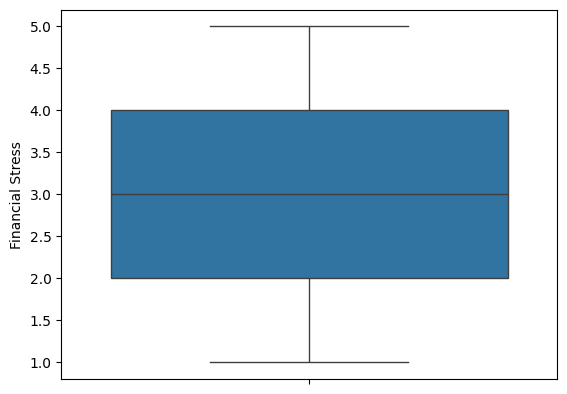

In [245]:
sns.boxplot(df['Financial Stress'])

<Axes: xlabel='Age'>

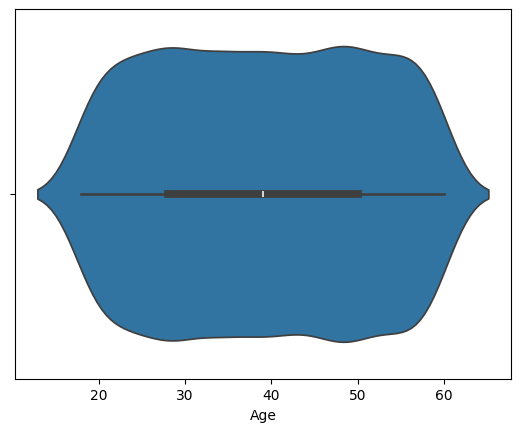

In [246]:
sns.violinplot(data=df, x="Age")

<Axes: xlabel='Work Pressure'>

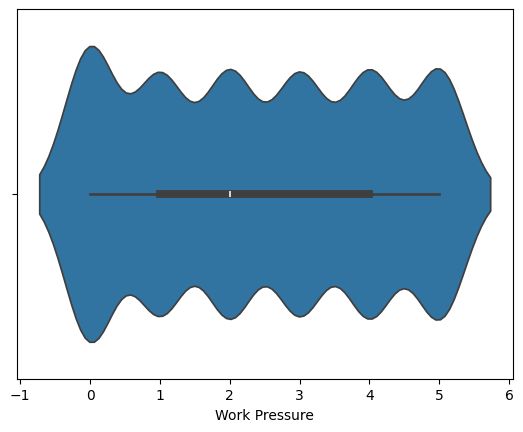

In [247]:
sns.violinplot(data=df, x='Work Pressure')

<Axes: xlabel='Job Satisfaction'>

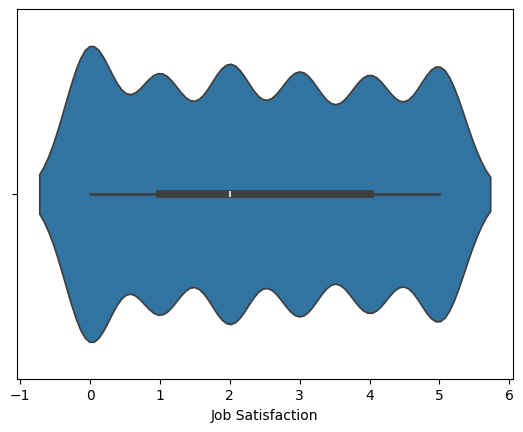

In [248]:
sns.violinplot(data=df, x='Job Satisfaction')

<Axes: xlabel='Work/Study Hours'>

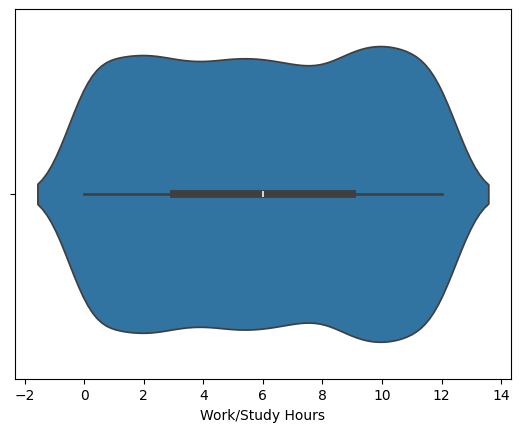

In [249]:
sns.violinplot(data=df, x='Work/Study Hours')

<Axes: xlabel='Financial Stress'>

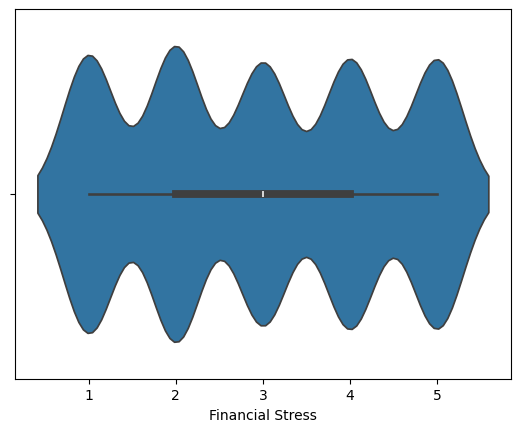

In [250]:
sns.violinplot(data=df, x='Financial Stress')

### *Categorize Degrees:*

In [290]:
def categorize_degree(degree):
    # Pre-University (Class 12)
    pre_university_degrees = ['Class 12']
    
    # Undergraduate degrees
    undergrad_degrees = [
        'B.Com', 'BA', 'B.Tech', 'B.Sc', 'B.Arch', 'B.Ed', 
        'B.Pharm', 'LLB', 'BBA', 'BHM', 'BE', 'BCA'
    ]
    
    # Postgraduate degrees
    postgrad_degrees = [
        'M.Com', 'MA', 'M.Tech', 'M.Sc', 'M.Ed', 'MBA', 
        'MCA', 'LLM', 'ME', 'MHM', 'M.Pharm'
    ]
    
    # Doctorate & Professional
    doctorate_degrees = ['PhD', 'MD', 'MBBS']

    # Categorization logic
    if degree in pre_university_degrees:
        return 'Pre-University'
    elif degree in undergrad_degrees:
        return 'Undergraduate'
    elif degree in postgrad_degrees:
        return 'Postgraduate'
    elif degree in doctorate_degrees:
        return 'Doctorate/Professional'
    else:
        return 'Other'

# Apply categorization
df['Degree'] = df['Degree'].apply(categorize_degree_india)



In [292]:
df.head()

,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,Pooja,Female,37,Ghaziabad,Working Professional,Teacher,NaN,2,NaN,NaN,4,7-8 hours,Moderate,Postgraduate,No,6,2,No,No
1,Reyansh,Male,60,Kalyan,Working Professional,Financial Analyst,NaN,4,NaN,NaN,3,5-6 hours,Unhealthy,Undergraduate,Yes,0,4,Yes,No
2,Manvi,Female,42,Bhopal,Working Professional,Teacher,NaN,2,NaN,NaN,3,5-6 hours,Moderate,Postgraduate,No,0,2,No,No
3,Isha,Female,44,Thane,Working Professional,Teacher,NaN,3,NaN,NaN,5,7-8 hours,Healthy,Doctorate/Professional,Yes,1,2,Yes,No
4,Aarav,Male,48,Indore,Working Professional,UX/UI Designer,NaN,4,NaN,NaN,3,7-8 hours,Moderate,Undergraduate,Yes,6,5,Yes,No


In [304]:
# Group the data by Degree and calculate mean (or median) for certain features
degree_analysis = df.groupby('Degree').agg({
    'Job Satisfaction' : 'mean',
    'Work Pressure' : 'mean',
    'Study Satisfaction' : 'mean',
    'Academic Pressure' : 'mean'
})
print(degree_analysis)


                        Job Satisfaction  Work Pressure  Study Satisfaction  \
Degree                                                                        
Doctorate/Professional          2.413043       2.434783            2.818182   
Other                           2.439153       2.492063            2.837838   
Postgraduate                    2.546635       2.574970            3.133858   
Pre-University                  1.974545       1.949091            3.211538   
Undergraduate                   2.440394       2.422660            3.068421   

                        Academic Pressure  
Degree                                     
Doctorate/Professional           3.000000  
Other                            2.918919  
Postgraduate                     2.897638  
Pre-University                   3.173077  
Undergraduate                    3.000000  


In [ ]:
## Continue from here

In [260]:
# Dataset for Working Professionals: drop unnecessary columns
df_work_professionals = df[df['Working Professional or Student'] == 'Working Professional']
df_work_professionals = df_work_professionals.drop(columns=['Academic Pressure', 'Study Satisfaction', 'CGPA'])

# Dataset for Students: drop unnecessary columns
df_students = df[df['Working Professional or Student'] == 'Student']
df_students = df_students.drop(columns=['Work Pressure', 'Job Satisfaction', 'Profession'])

# Now both datasets are clean and ready for training and analysis


In [261]:
df_work_professionals.head()


,Name,Gender,Age,City,Working Professional or Student,Profession,Work Pressure,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,Pooja,Female,37,Ghaziabad,Working Professional,Teacher,2,4,7-8 hours,Moderate,Postgraduate,No,6,2,No,No
1,Reyansh,Male,60,Kalyan,Working Professional,Financial Analyst,4,3,5-6 hours,Unhealthy,Undergraduate,Yes,0,4,Yes,No
2,Manvi,Female,42,Bhopal,Working Professional,Teacher,2,3,5-6 hours,Moderate,Postgraduate,No,0,2,No,No
3,Isha,Female,44,Thane,Working Professional,Teacher,3,5,7-8 hours,Healthy,Doctorate/Professional,Yes,1,2,Yes,No
4,Aarav,Male,48,Indore,Working Professional,UX/UI Designer,4,3,7-8 hours,Moderate,Undergraduate,Yes,6,5,Yes,No


In [262]:
df_students.head()

,Name,Gender,Age,City,Working Professional or Student,Academic Pressure,CGPA,Study Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
17,Advait,Male,28,Varanasi,Student,2.0,6.51,4.0,7-8 hours,Moderate,Undergraduate,Yes,9,2,Yes,No
19,Sanket,Male,28,Bangalore,Student,4.0,7.48,5.0,5-6 hours,Healthy,Doctorate/Professional,Yes,7,1,Yes,No
28,Ranveer,Male,25,Rajkot,Student,1.0,7.21,3.0,5-6 hours,Unhealthy,Doctorate/Professional,Yes,10,4,No,Yes
33,Gagan,Male,23,Mumbai,Student,1.0,9.90,4.0,More than 8 hours,Unhealthy,Other,Yes,7,2,Yes,No
35,Tina,Female,31,Vadodara,Student,1.0,5.97,5.0,More than 8 hours,Healthy,Postgraduate,Yes,4,2,Yes,No


In [263]:
carbon_tracker.update_project_name('EDA')
carbon_tracker.update_project_name('EDA')